In [37]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from kohonen import *
from helpers import *
%load_ext autoreload
%autoreload 2
    
# load in data and labels    
data = np.array(np.loadtxt('data/data.txt'))
labels = np.loadtxt('data/labels.txt')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


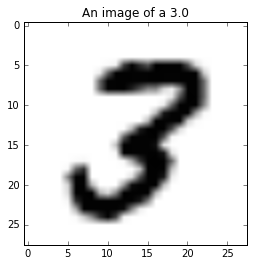

In [9]:
data_matrix = rewritedata(data)
visualize(data_matrix[i,:,:],labels[i])

C:\Users\andre\Documents\EPFL\Boulot\NN\miniproject_1\src\kohonen.py:139: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.sort(x[t,:])


[0 5 7 9]


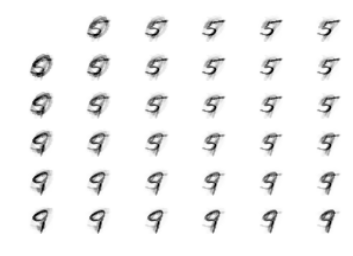

In [42]:
def kohonen(data,labels):
    """Example for using create_data, plot_data and som_step.
    """
    plb.close('all')
    
    dim = 28*28
    data_range = 255.0
    
    # load in data and labels    
    #data = np.array(np.loadtxt('data/data.txt'))
    #labels = np.loadtxt('data/labels.txt')

    # select 4 digits    
    name = 'Andre Cibils' # REPLACE BY YOUR OWN NAME
    targetdigits = name2digits(name) # assign the four digits that should be used
    print(targetdigits) # output the digits that were selected
    # this selects all data vectors that corresponds to one of the four digits
    data = data[np.logical_or.reduce([labels==x for x in targetdigits]),:]
    
    dy, dx = data.shape
    
    #set the size of the Kohonen map. In this case it will be 6 X 6
    size_k = 6
    
    #set the width of the neighborhood via the width of the gaussian that
    #describes it
    sigma = 3.0
    
    #initialise the centers randomly
    centers = np.random.rand(size_k**2, dim) * data_range
    
    #build a neighborhood matrix
    neighbor = np.arange(size_k**2).reshape((size_k, size_k))

    #set the learning rate
    eta = 0.5 # HERE YOU HAVE TO SET YOUR OWN LEARNING RATE
    
    #set the maximal iteration count
    tmax = 5000 # this might or might not work; use your own convergence criterion
    
    #set the random order in which the datapoints should be presented
    i_random = np.arange(tmax) % dy
    np.random.shuffle(i_random)
    
    for t, i in enumerate(i_random):
        som_step(centers, data[i,:],neighbor,eta,sigma)


    # for visualization, you can use this:
    for i in range(1,size_k**2):
        plb.subplot(size_k,size_k,i+1)
        
        plb.imshow(np.reshape(centers[i,:], [28, 28]),cmap='Greys',interpolation='bilinear')
        plb.axis('off')
        
    # leave the window open at the end of the loop
    plb.show()
    plb.draw()
    
    
kohonen(data,labels)